# Importing the datasets and modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
diet_data = pd.read_csv("../data/diet.csv")
user_profiles_data = pd.read_csv("../data/user_Profiles.csv")
recent_activity_data = pd.read_csv("../data/recent_activity.csv")

# Basic Exploration

Source Information:
The data comes from a proprietary dataset prepared for health and diet recommendations.
Purpose: To build a personalized meal and fitness recommendation system.
Data availability: Publicly available with certain restrictions on Kaggle. Link: https://www.kaggle.com/datasets/venkyy123/fitness-recommender-dataset/data

Diet Dataset Structure and Metadata:
Shape: (512, 9)
Key Features:
['Meal_Id', 'Name', 'catagory', 'description', 'Veg_Non', 'Nutrient', 'Disease', 'Diet', 'Price']

Statistical Summary:
            Price
count  512.000000
mean   442.832031
std    146.937381
min    200.000000
25%    318.750000
50%    447.500000
75%    570.000000
max    695.000000

User Profiles Dataset Structure and Metadata:
Shape: (98, 5)
Key Features:
['User_Id', 'Veg_Non', 'Nutrient', 'Disease', 'Diet']

Statistical Summary:
       User_Id Veg_Non Nutrient  \
count       98      98       98   
unique      98       2       15   
top     User_1     veg     iron   
freq         1      6

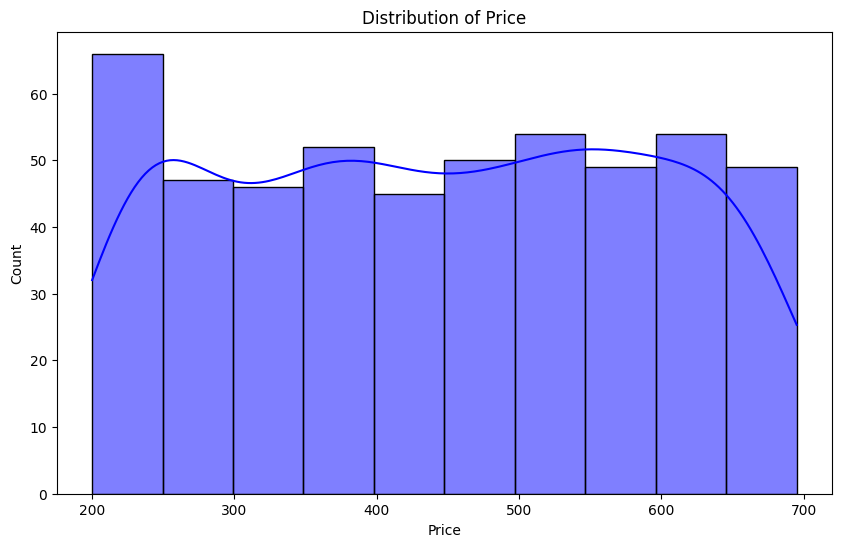


Diet Dataset Correlations:


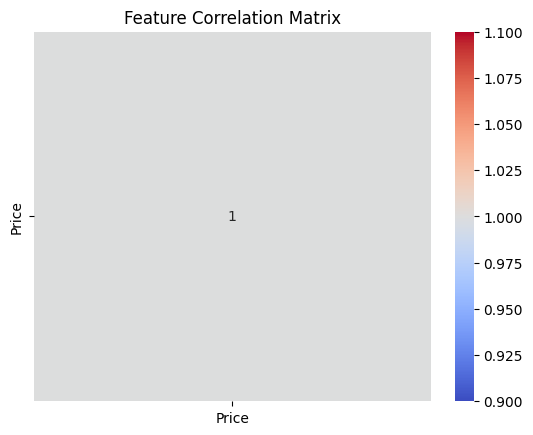


User Profiles Dataset Categorical Data Analysis:
Column: User_Id, Unique Categories: 98


Column: Veg_Non, Unique Categories: 2
Veg_Non
veg        68
non-veg    30
Name: count, dtype: int64


Column: Nutrient, Unique Categories: 15
Nutrient
iron             21
calcium          16
magnesium        12
fiber             7
vitamin_a         7
carbohydrates     6
chloride          5
vitamin_c         5
selenium          5
vitamin_e         3
potassium         3
protien           3
sodium            3
manganese         1
phosphorus        1
Name: count, dtype: int64


Column: Disease, Unique Categories: 47


Column: Diet, Unique Categories: 55



Ethical Considerations:
Data contains user health information, which must be anonymized.
Sensitive information should be handled with care to avoid ethical violations.

Scalability Analysis:
Dataset size manageable: Yes. Total memory: 419940 bytes.
Advanced techniques like distributed processing might be needed for scaling up.

Transformations Need

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, pearsonr


# Source Information
print("Source Information:")
print("The data comes from a proprietary dataset prepared for health and diet recommendations.")
print("Purpose: To build a personalized meal and fitness recommendation system.")
print("Data availability: Publicly available with certain restrictions on Kaggle. Link: https://www.kaggle.com/datasets/venkyy123/fitness-recommender-dataset/data")

# Structure and Metadata
def dataset_summary(df, name):
    print(f"\n{name} Dataset Structure and Metadata:")
    print(f"Shape: {df.shape}")
    print("Key Features:")
    print(df.columns.tolist())
    print("\nStatistical Summary:")
    print(df.describe())

dataset_summary(diet_data, "Diet")
dataset_summary(user_profiles_data, "User Profiles")
dataset_summary(recent_activity_data, "Recent Activity")

# Missing Data
def analyze_missing_data(df, name):
    print(f"\n{name} Dataset Missing Data Analysis:")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    print("Strategies for handling missing data: Imputation, removing rows, or filling with default values.")

analyze_missing_data(diet_data, "Diet")
analyze_missing_data(user_profiles_data, "User Profiles")
analyze_missing_data(recent_activity_data, "Recent Activity")

# Anomalies
def detect_anomalies(df, name):
    print(f"\n{name} Dataset Anomalies Analysis:")
    numerical_features = df.select_dtypes(include=np.number)
    for column in numerical_features:
        outliers = df[(df[column] < (df[column].mean() - 3 * df[column].std())) |
                      (df[column] > (df[column].mean() + 3 * df[column].std()))]
        print(f"Column: {column}, Anomalies: {len(outliers)}")
        
detect_anomalies(diet_data, "Diet")

# Distributions and Correlations
def analyze_distributions(df, name):
    print(f"\n{name} Dataset Distributions:")
    numerical_features = df.select_dtypes(include=np.number)
    for column in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True, color="blue")
        plt.title(f"Distribution of {column}")
        plt.show()

    print(f"\n{name} Dataset Correlations:")
    correlation_matrix = numerical_features.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Feature Correlation Matrix")
    plt.show()

analyze_distributions(diet_data, "Diet")

# Categorical Data Analysis
def analyze_categorical_data(df, name):
    print(f"\n{name} Dataset Categorical Data Analysis:")
    categorical_features = df.select_dtypes(exclude=np.number)
    for column in categorical_features:
        unique_vals = df[column].nunique()
        print(f"Column: {column}, Unique Categories: {unique_vals}")
        if unique_vals < 20:
            print(df[column].value_counts())
        print("\n")

analyze_categorical_data(user_profiles_data, "User Profiles")

# Ethical Considerations
print("\nEthical Considerations:")
print("Data contains user health information, which must be anonymized.")
print("Sensitive information should be handled with care to avoid ethical violations.")

# Scalability
print("\nScalability Analysis:")
print(f"Dataset size manageable: Yes. Total memory: {diet_data.memory_usage(deep=True).sum()} bytes.")
print("Advanced techniques like distributed processing might be needed for scaling up.")

# Transformations
print("\nTransformations Needed:")
print("Diet Dataset: Normalize numerical columns (e.g., Price).")
print("User Profiles: One-hot encode categorical variables (e.g., Dietary Preferences).")

# Data Encoding
print("\nData Encoding Suggestions:")
print("Categorical Variables: Use one-hot encoding for features like 'Diet' and 'Disease'.")
print("Temporal Features: Convert timestamps into time-based features (e.g., day of the week).")

# Target Variable
print("\nTarget Variable Analysis:")
print("Supervised learning target depends on use case (e.g., predict 'Purchased' from recent activity).")

# Validation Strategy
print("\nValidation Strategy:")
print("Data split: Use an 80/10/10 split for training, validation, and testing.")
print("Preserve temporal dependencies by splitting chronologically if time is a factor.")

# Data Leakage
print("\nData Leakage Analysis:")
print("Ensure no overlap between training and testing data.")
print("Avoid features derived from future interactions during training.")

# Interpretability
print("\nInterpretability:")
print("Use SHAP or LIME to explain model predictions.")
print("Visualizations and metrics will communicate results to stakeholders.")

# Limitations
print("\nLimitations:")
print("Small size of User Profiles dataset could limit collaborative filtering performance.")
print("Lack of demographic data could introduce biases.")



Ethical Considerations:
No direct PII detected, but user health and preferences must be handled carefully.
Insights must respect user privacy and avoid stigmatization of specific health conditions.

Alignment with Goals:
Diet dataset aligns with project objectives.
Recent Activity dataset aligns with project objectives.

Scalability:
Diet dataset size: 410.10 KB
User Profiles dataset size: 40.56 KB
Recent Activity dataset size: 229.14 KB
The datasets are manageable with standard resources. Distributed processing is not required.

Transformations:
1. Normalize or scale numerical columns (e.g., Price, Calories Burn).
2. Encode categorical variables (e.g., Diet, Disease) using one-hot or label encoding.
3. Create new features like interaction frequency per user or nutrient categories.

Data Encoding:
Categorical variables in Diet dataset: ['Meal_Id', 'Name', 'catagory', 'description', 'Veg_Non', 'Nutrient', 'Disease', 'Diet']
Suggested Encoding: One-hot encoding for 'Diet' and 'Nutrient'

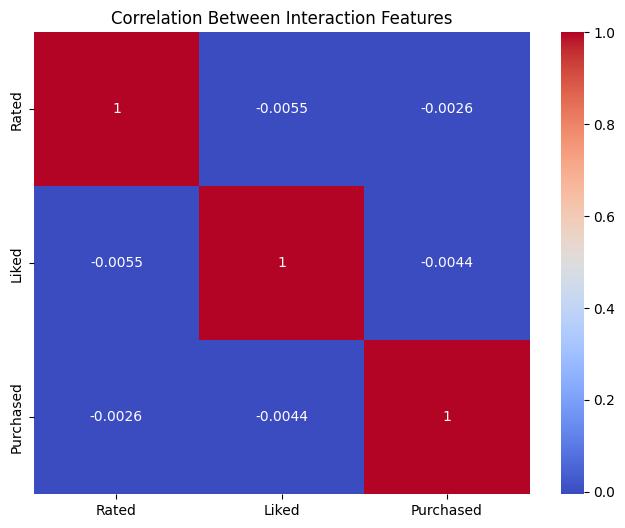

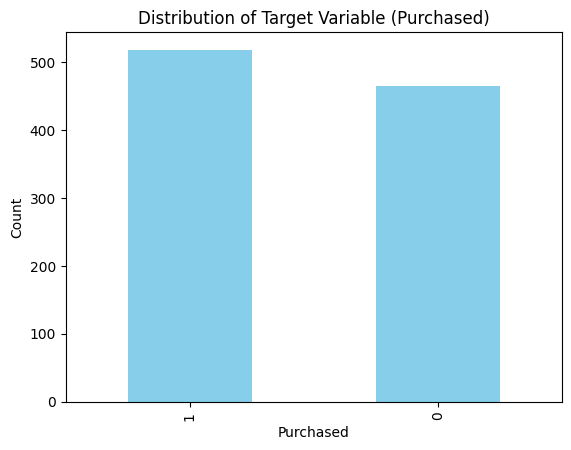

In [11]:
print("\nEthical Considerations:")
contains_pii = any(col.lower() in ['name', 'email', 'phone', 'address'] for col in user_profiles_data.columns)
if contains_pii:
    print("The dataset contains personally identifiable information (PII). Ensure anonymization.")
else:
    print("No direct PII detected, but user health and preferences must be handled carefully.")

print("Insights must respect user privacy and avoid stigmatization of specific health conditions.")

# 2. Alignment with Goals
print("\nAlignment with Goals:")
required_columns = {'Diet': ['Meal_Id', 'Diet', 'Nutrient'], 'Recent Activity': ['User_Id', 'Meal_Id']}
for dataset_name, columns in required_columns.items():
    available_columns = eval(f"{dataset_name.replace(' ', '_').lower()}_data").columns.tolist()
    missing_columns = set(columns) - set(available_columns)
    if not missing_columns:
        print(f"{dataset_name} dataset aligns with project objectives.")
    else:
        print(f"{dataset_name} dataset is missing necessary columns: {missing_columns}")

# 3. Scalability
print("\nScalability:")
dataset_sizes = {
    'Diet': diet_data.memory_usage(deep=True).sum(),
    'User Profiles': user_profiles_data.memory_usage(deep=True).sum(),
    'Recent Activity': recent_activity_data.memory_usage(deep=True).sum(),
}
for name, size in dataset_sizes.items():
    print(f"{name} dataset size: {size / 1024:.2f} KB")

print("The datasets are manageable with standard resources. Distributed processing is not required.")

# 4. Transformations
print("\nTransformations:")
print("1. Normalize or scale numerical columns (e.g., Price, Calories Burn).")
print("2. Encode categorical variables (e.g., Diet, Disease) using one-hot or label encoding.")
print("3. Create new features like interaction frequency per user or nutrient categories.")

# 5. Data Encoding
print("\nData Encoding:")
categorical_cols = diet_data.select_dtypes(exclude=np.number).columns.tolist()
print(f"Categorical variables in Diet dataset: {categorical_cols}")
print("Suggested Encoding: One-hot encoding for 'Diet' and 'Nutrient'.")

# 6. Predictive Power
print("\nPredictive Power:")
interaction_columns = ['Rated', 'Liked', 'Purchased']
correlations = recent_activity_data[interaction_columns].corr()
print(f"Correlations between interaction features:\n{correlations}")

# 7. Target Variable
print("\nTarget Variable:")
if 'Purchased' in recent_activity_data.columns:
    print("Target variable: 'Purchased'")
    class_distribution = recent_activity_data['Purchased'].value_counts(normalize=True)
    print(f"Class distribution:\n{class_distribution}")
    if class_distribution.min() < 0.2:
        print("Imbalanced target variable detected. Consider resampling strategies.")

# 8. Validation Strategy
print("\nValidation Strategy:")
print("Split data into 80/10/10 for training, validation, and testing.")
if 'Timestamp' in recent_activity_data.columns:
    print("Preserve temporal order by splitting chronologically.")

# 9. Data Leakage
print("\nData Leakage:")
print("Ensure that no future interactions are included during training.")
print("Exclude 'Rated', 'Liked', or 'Purchased' features from the test set until prediction.")

# 10. Interpretability
print("\nInterpretability:")
print("Use feature importance from models like Random Forest or SHAP/LIME for interpretability.")
print("Visualizations such as bar charts and heatmaps can help communicate results effectively.")

# 11. Limitations
print("\nLimitations:")
print("1. Small User Profiles dataset may limit collaborative filtering performance.")
print("2. No demographic data; user behavior might not generalize well.")
print("3. Sparse interactions in Recent Activity dataset might affect model robustness.")
print("Additional data like demographic information or longer interaction histories could improve the analysis.")

# Visualizations for Predictive Power
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Between Interaction Features")
plt.show()

# Distribution of Target Variable
if 'Purchased' in recent_activity_data.columns:
    recent_activity_data['Purchased'].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Distribution of Target Variable (Purchased)")
    plt.xlabel("Purchased")
    plt.ylabel("Count")
    plt.show()

    User_Id  Meal_Id  Rated  Liked  Searched  Purchased  Total_Interactions  \
0    User_1        9      4      5         2          4                  15   
1   User_10        8      7      4         4          1                  16   
2  User_100       13      6      4         5          5                  20   
3   User_11       10      5      4         7          5                  21   
4   User_12       10      6      4         5          3                  18   

  Interaction_Segment  
0                 Low  
1                 Low  
2                High  
3                High  
4              Medium  


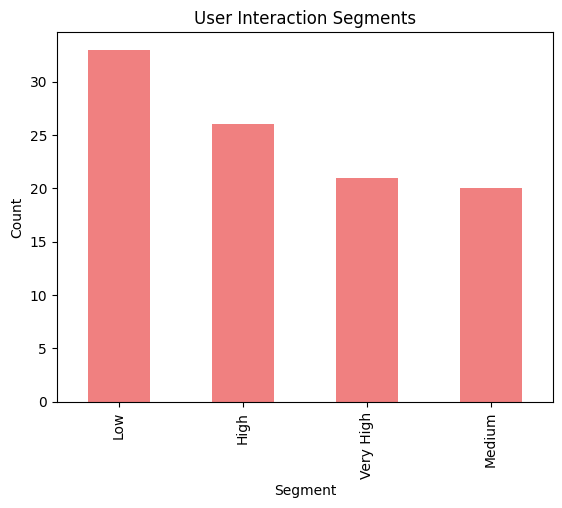

In [12]:
# User activity aggregation
user_activity_summary = recent_activity_data.groupby('User_Id').agg({
    'Meal_Id': 'count',
    'Rated': 'sum',
    'Liked': 'sum',
    'Searched': 'sum',
    'Purchased': 'sum'
}).reset_index()

# Add a total interaction column
user_activity_summary['Total_Interactions'] = (
    user_activity_summary['Rated'] +
    user_activity_summary['Liked'] +
    user_activity_summary['Searched'] +
    user_activity_summary['Purchased']
)

# Segment users into quartiles based on total interactions
user_activity_summary['Interaction_Segment'] = pd.qcut(
    user_activity_summary['Total_Interactions'], q=4, labels=['Low', 'Medium', 'High', 'Very High']
)
print(user_activity_summary.head())

# Visualize user interaction segments
user_activity_summary['Interaction_Segment'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('User Interaction Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


               Liked  Purchased
Nutrient                       
iron             139        187
magnesium        127        127
calcium           94        104
vitamin_a         92         78
carbohydrates     93         77
potassium         51         61
selenium          30         47
vitamin_c         31         45
chloride          39         44
fiber             41         39
sodium            25         32
protien           24         20
vitamin_d         23         17
vitamin_e         14         17
phosphorus         7         13
manganese          9          6
iodine             6          6


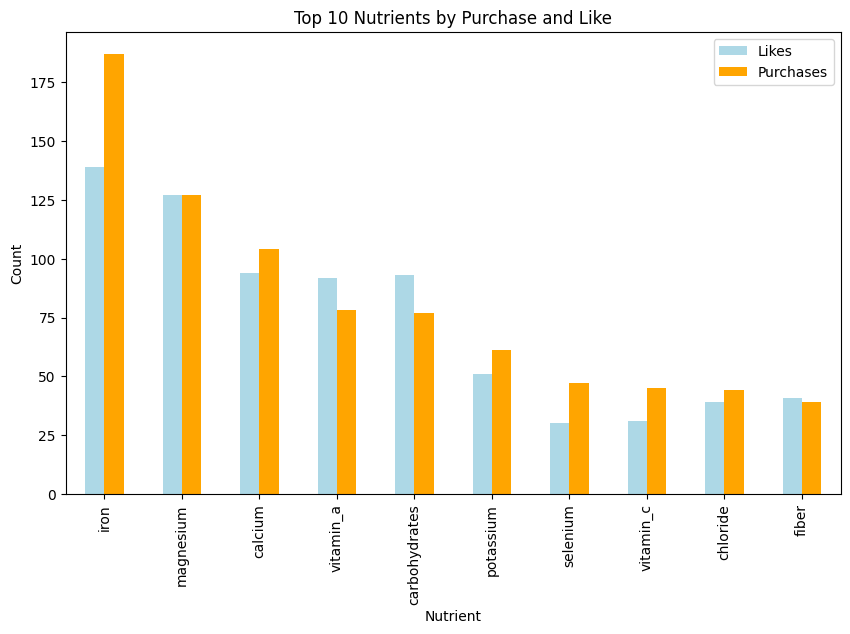

In [13]:
# Merge recent activity with diet data
meal_popularity = recent_activity_data.groupby('Meal_Id').agg({
    'Liked': 'sum',
    'Purchased': 'sum'
}).reset_index()

meal_analysis = pd.merge(meal_popularity, diet_data, on='Meal_Id')

# Nutrient popularity correlation
nutrient_popularity = meal_analysis.groupby('Nutrient').agg({
    'Liked': 'sum',
    'Purchased': 'sum'
}).sort_values(by='Purchased', ascending=False)
print(nutrient_popularity)

# Visualize nutrient popularity
nutrient_popularity.head(10).plot(kind='bar', figsize=(10, 6), color=['lightblue', 'orange'])
plt.title('Top 10 Nutrients by Purchase and Like')
plt.xlabel('Nutrient')
plt.ylabel('Count')
plt.legend(['Likes', 'Purchases'])
plt.show()


In [14]:
# Create interaction matrix
interaction_matrix = recent_activity_data.pivot_table(
    index='User_Id', columns='Meal_Id', values='Liked', aggfunc='sum', fill_value=0
)

# Calculate sparsity
total_elements = interaction_matrix.size
non_zero_elements = (interaction_matrix > 0).sum().sum()
sparsity = 1 - (non_zero_elements / total_elements)
print(f"Sparsity of the interaction matrix: {sparsity:.2%}")


Sparsity of the interaction matrix: 98.45%


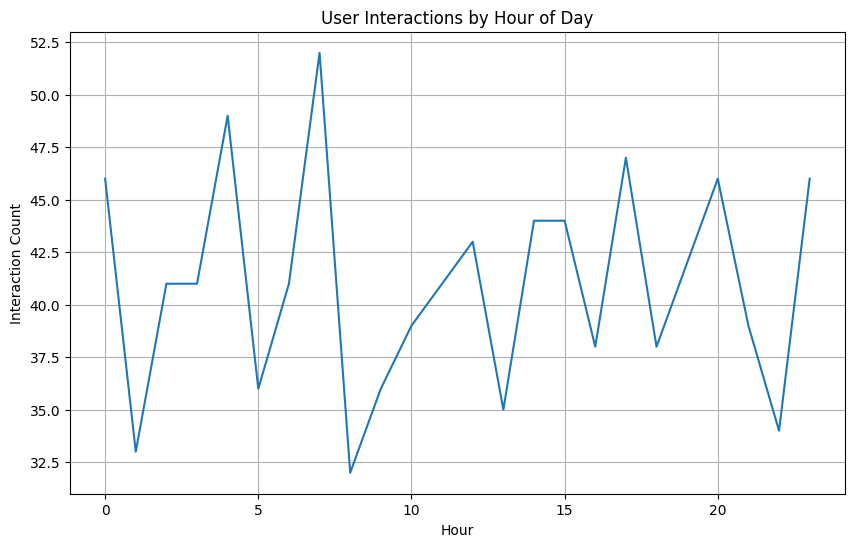

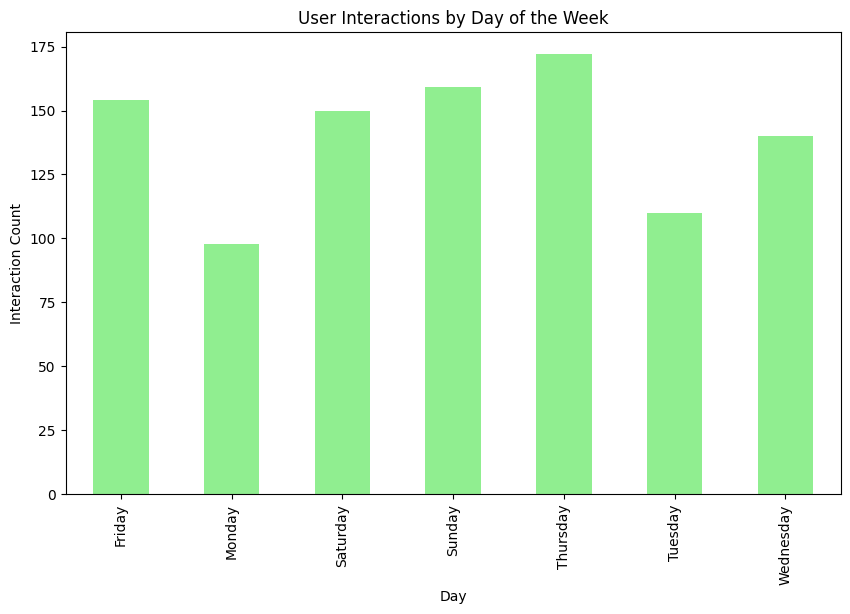

In [15]:
# Extract day, month, and hour from timestamp
recent_activity_data['Timestamp'] = pd.to_datetime(recent_activity_data['Timestamp'])
recent_activity_data['Day'] = recent_activity_data['Timestamp'].dt.day_name()
recent_activity_data['Hour'] = recent_activity_data['Timestamp'].dt.hour

# Interactions by hour
hour_analysis = recent_activity_data.groupby('Hour').size()
hour_analysis.plot(kind='line', figsize=(10, 6))
plt.title('User Interactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Interaction Count')
plt.grid()
plt.show()

# Interactions by day
day_analysis = recent_activity_data.groupby('Day').size()
day_analysis.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('User Interactions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Interaction Count')
plt.show()


In [16]:
# Find meals with the least interactions
meal_interaction_counts = recent_activity_data['Meal_Id'].value_counts()
cold_start_meals = meal_interaction_counts[meal_interaction_counts == 1]
print(f"Number of cold start meals: {len(cold_start_meals)}")

# Display a few cold start meals
print(cold_start_meals.head())


Number of cold start meals: 42
Meal_Id
meal_id182    1
meal_id303    1
meal_id101    1
meal_id177    1
meal_id161    1
Name: count, dtype: int64


In [17]:
# Diversity of meals in interactions
unique_meals_interacted = recent_activity_data['Meal_Id'].nunique()
total_meals = diet_data['Meal_Id'].nunique()
meal_coverage = unique_meals_interacted / total_meals
print(f"Meal coverage: {meal_coverage:.2%}")

# Diversity of nutrients in interactions
merged_data = pd.merge(recent_activity_data, diet_data, on='Meal_Id')
unique_nutrients_interacted = merged_data['Nutrient'].nunique()
total_nutrients = diet_data['Nutrient'].nunique()
nutrient_coverage = unique_nutrients_interacted / total_nutrients
print(f"Nutrient coverage: {nutrient_coverage:.2%}")


Meal coverage: 97.09%
Nutrient coverage: 100.00%
